In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('diabetes_dataset.csv')

In [3]:
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [4]:
df.columns

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')

<Axes: xlabel='Outcome', ylabel='count'>

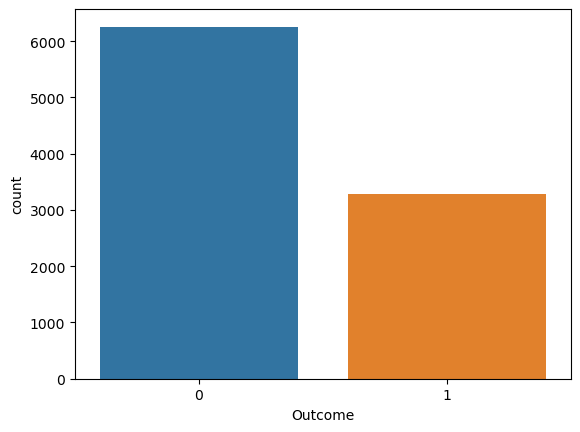

In [5]:
sns.countplot(data=df,x='Outcome')

<Axes: xlabel='Outcome', ylabel='BMI'>

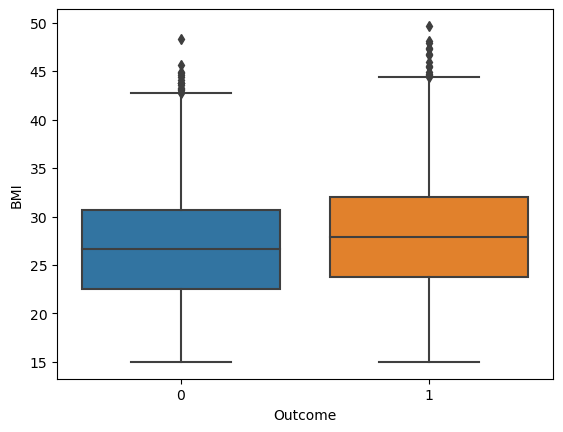

In [17]:
sns.boxplot(data=df,x='Outcome',y='BMI')

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
l=LogisticRegression()

In [23]:
from sklearn.model_selection import train_test_split
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [24]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
s=StandardScaler()

In [29]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [30]:
l.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=l.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [35]:
accuracy_score(y_test,y_pred)

0.340851334180432

In [36]:
precision_score(y_test,y_pred)

0.340851334180432

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[   0, 2075],
       [   0, 1073]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2075
           1       0.34      1.00      0.51      1073

    accuracy                           0.34      3148
   macro avg       0.17      0.50      0.25      3148
weighted avg       0.12      0.34      0.17      3148



c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.model_selection import GridSearchCV
p=['l1','l2','elasticnet']
c=np.logspace(0,10,20)
l1_ratio=np.linspace(0,10,20)
pg={'penalty':p,'C':c,'l1_ratio':l1_ratio}

In [47]:
g=GridSearchCV(estimator=l,param_grid=pg)

In [48]:
g.fit(X_train,y_train)

c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\rayan\Downloads\d\Lib

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [49]:
g.best_params_

{'C': 4832.930238571752, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [50]:
g.best_estimator_

LogisticRegression(C=4832.930238571752, l1_ratio=0.0)

In [51]:
y_gn_pred=g.predict(X_test)

In [52]:
accuracy_score(y_test,y_gn_pred)

0.340851334180432

In [53]:
precision_score(y_test,y_gn_pred)

0.340851334180432

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_gn_pred)

array([[   0, 2075],
       [   0, 1073]], dtype=int64)

In [56]:
print(classification_report(y_test,y_gn_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2075
           1       0.34      1.00      0.51      1073

    accuracy                           0.34      3148
   macro avg       0.17      0.50      0.25      3148
weighted avg       0.12      0.34      0.17      3148



c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
df.head(1)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0


In [63]:
from joblib import dump,load

In [64]:
dump(g,'Diabetesclassifier')

['Diabetesclassifier']

In [66]:
loaded_model=load('Diabetesclassifier')

In [71]:
p=[[10,6,29.83,134.2,78.2,5.39,134.2,45,58.7,82.5,100,0.86,1,2,0,1]]

In [72]:
loaded_model.predict(p)

array([1], dtype=int64)

In [73]:
loaded_model.predict_proba(p)

array([[0., 1.]])